# Question


Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corollav[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid',palette='viridis')
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [2]:
df  = pd.read_excel(r"C:\Users\yashv\Desktop\DS Assignment\Multipule linear rig Done\ToyotaCorolla2.xlsx")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### Creating actual data

In [3]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
df.drop(columns=['Id','Model','Mfg_Month', 'Mfg_Year','Fuel_Type','Met_Color', 'Color', 'Automatic','Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],inplace=True)

In [5]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [6]:
df

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Basic EDA

In [7]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
df.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
df[df.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## Looking for Corr

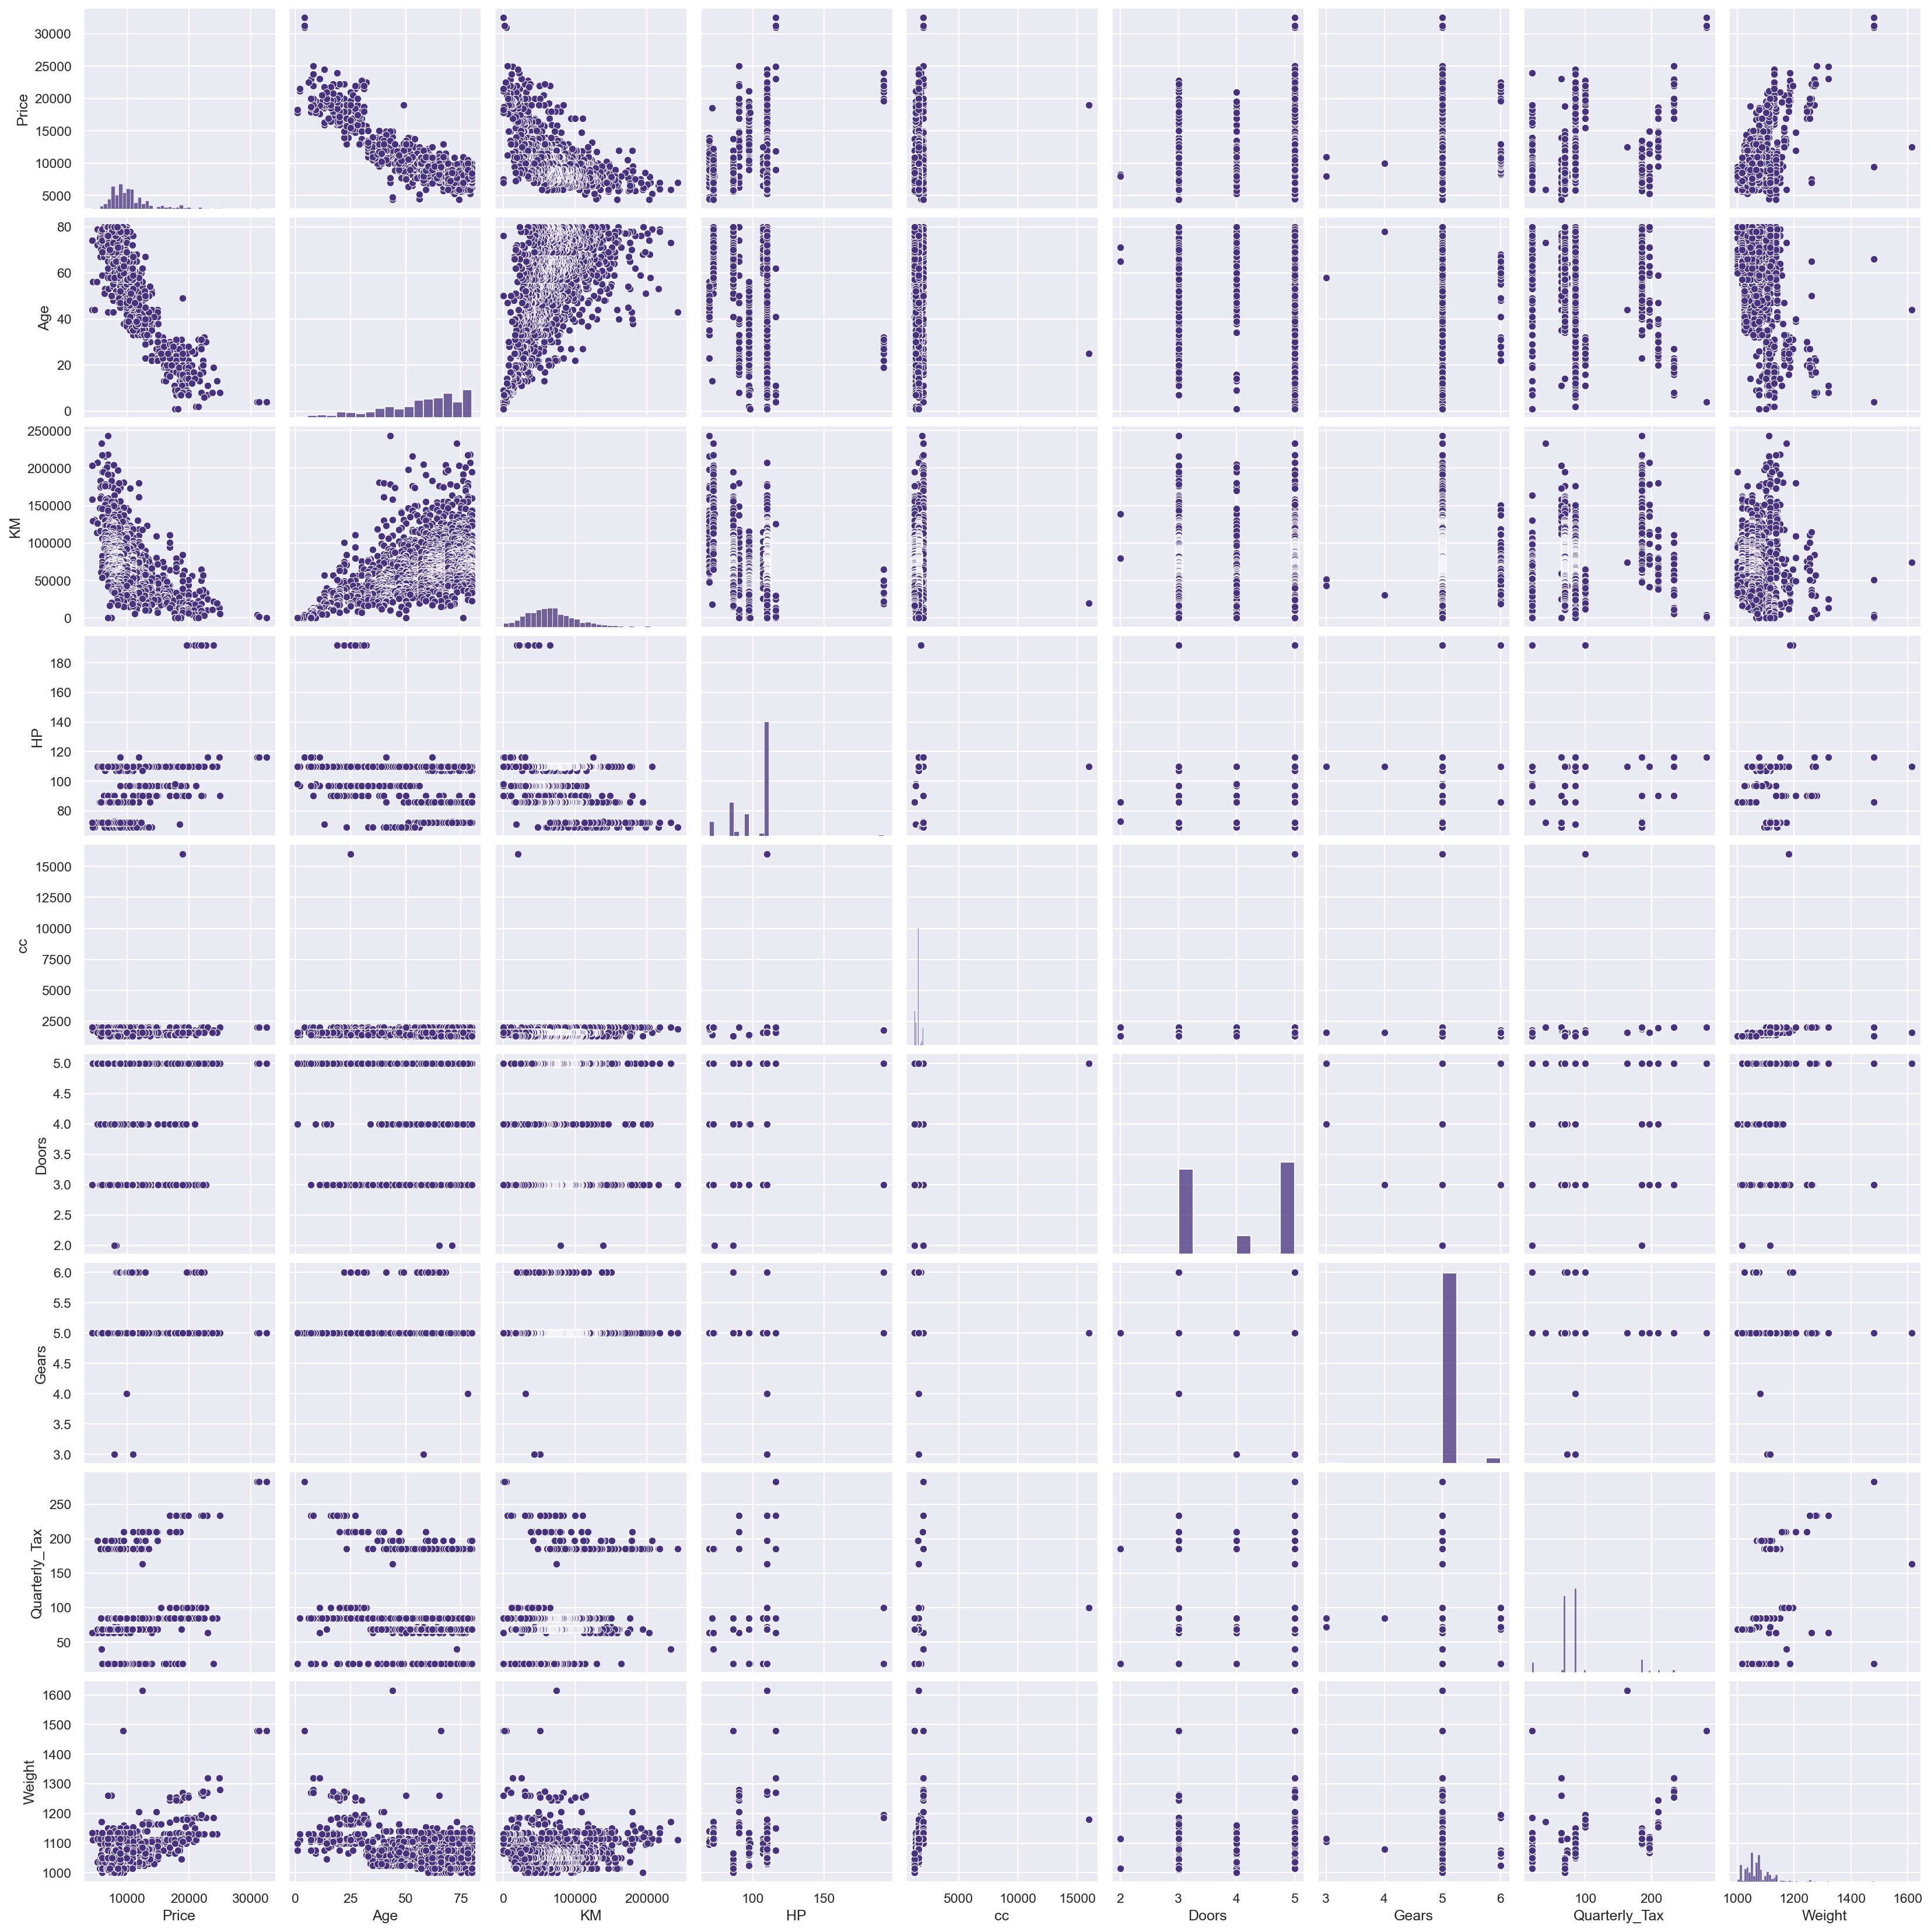

In [12]:
sns.pairplot(df)

<AxesSubplot:>

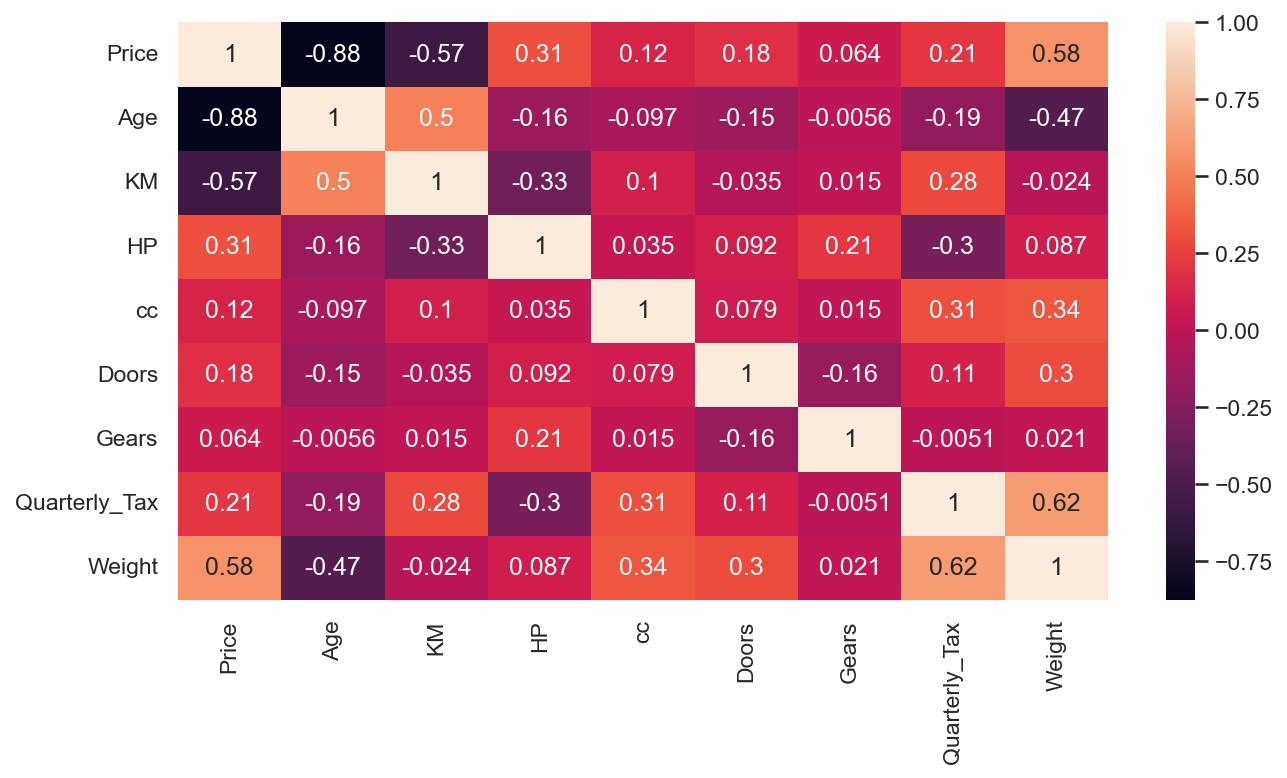

In [13]:
sns.heatmap(df.corr(),annot=True)

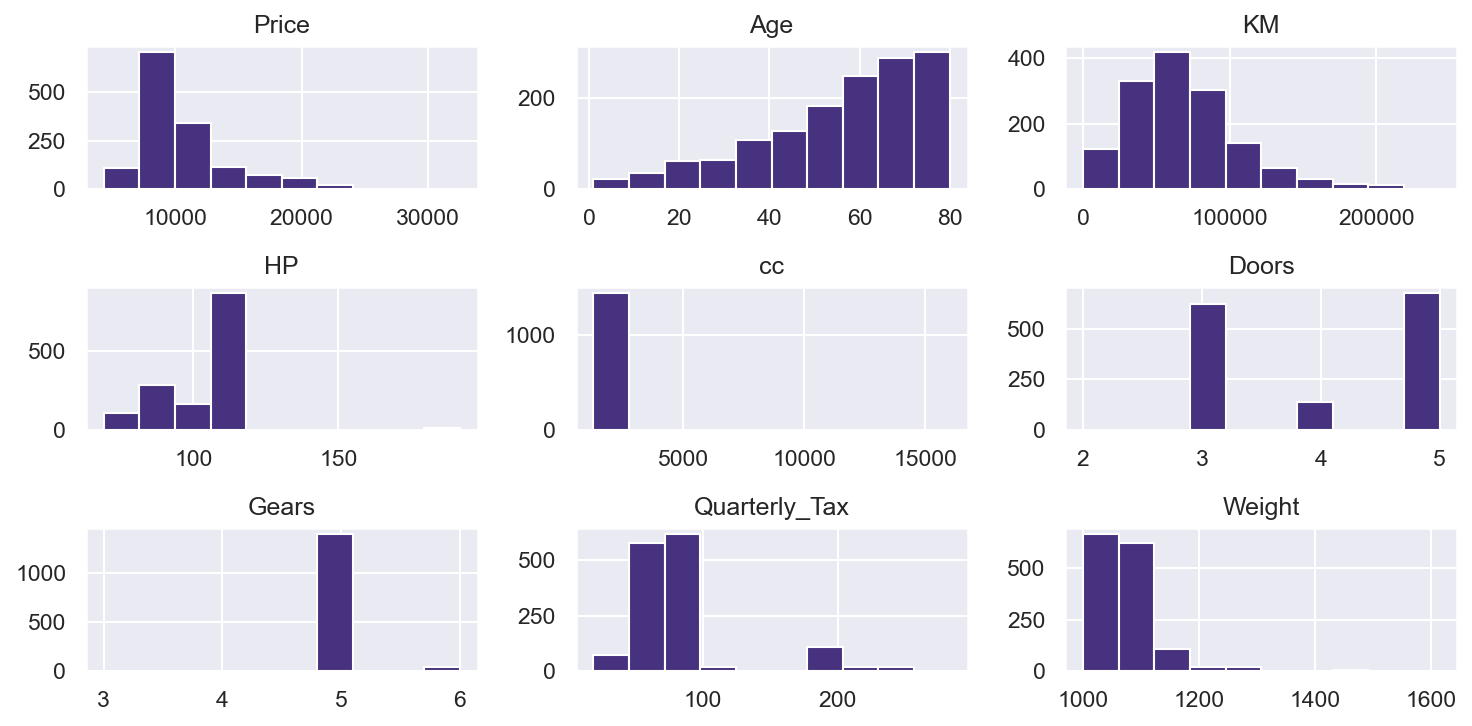

In [14]:
df.hist()
plt.tight_layout()


## Model Bulding

In [15]:

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

### Finding Parameatesrs

In [16]:

model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

### Finding pvalue

In [17]:
model.pvalues

Intercept         1.113392e-04
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64

### Finding rsquareed value

In [18]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

# `Model Accuracy = 86.17%`

### Model Validation Techniques

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [21]:
vif['Features'] = df.columns

In [22]:
vif

,vif,Features
0,70.770259,Price
1,46.662057,Age
2,9.005938,KM
3,71.361440,HP
4,17.201048,cc
5,21.856498,Doors
6,439.792421,Gears
7,11.187125,Quarterly_Tax
8,668.038614,Weight


In [23]:
import statsmodels.api as sm


In [24]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1431   -1294.255037
1432    2552.422658
1433      44.565598
1434   -1329.222041
1435   -3446.087526
Length: 1435, dtype: float64

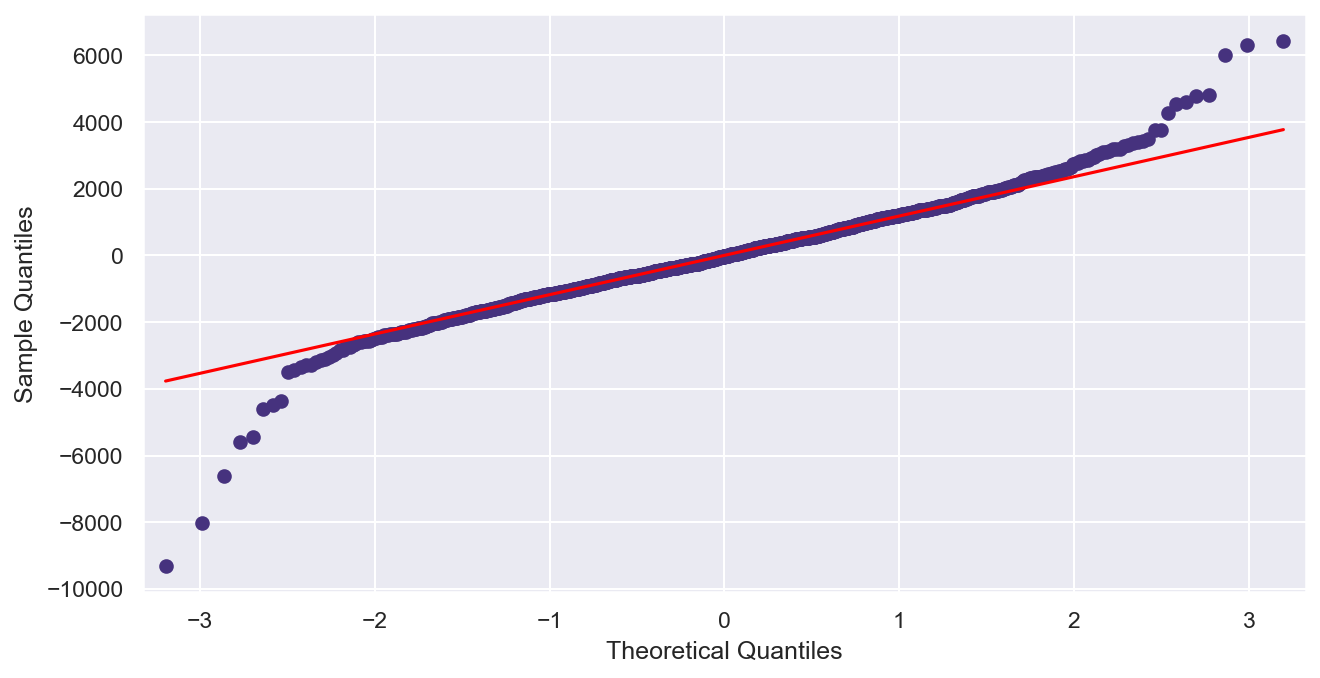

In [25]:
sm.qqplot(model.resid,line='q')
plt.show()

In [26]:
np.where(model.resid>5000)


(array([109, 146, 522], dtype=int64),)

In [27]:
np.where(model.resid<-6000)

(array([220, 600, 959], dtype=int64),)

Text(0, 0.5, 'Residuals')

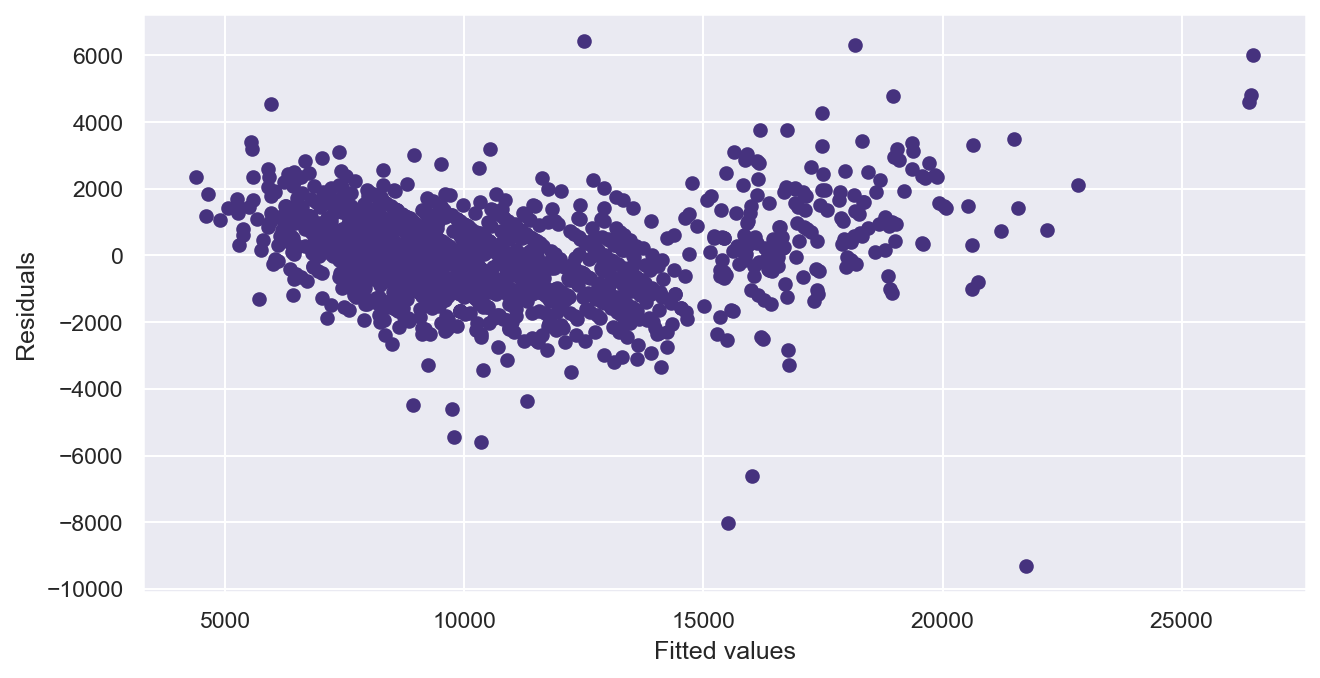

In [28]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

eval_env: 1


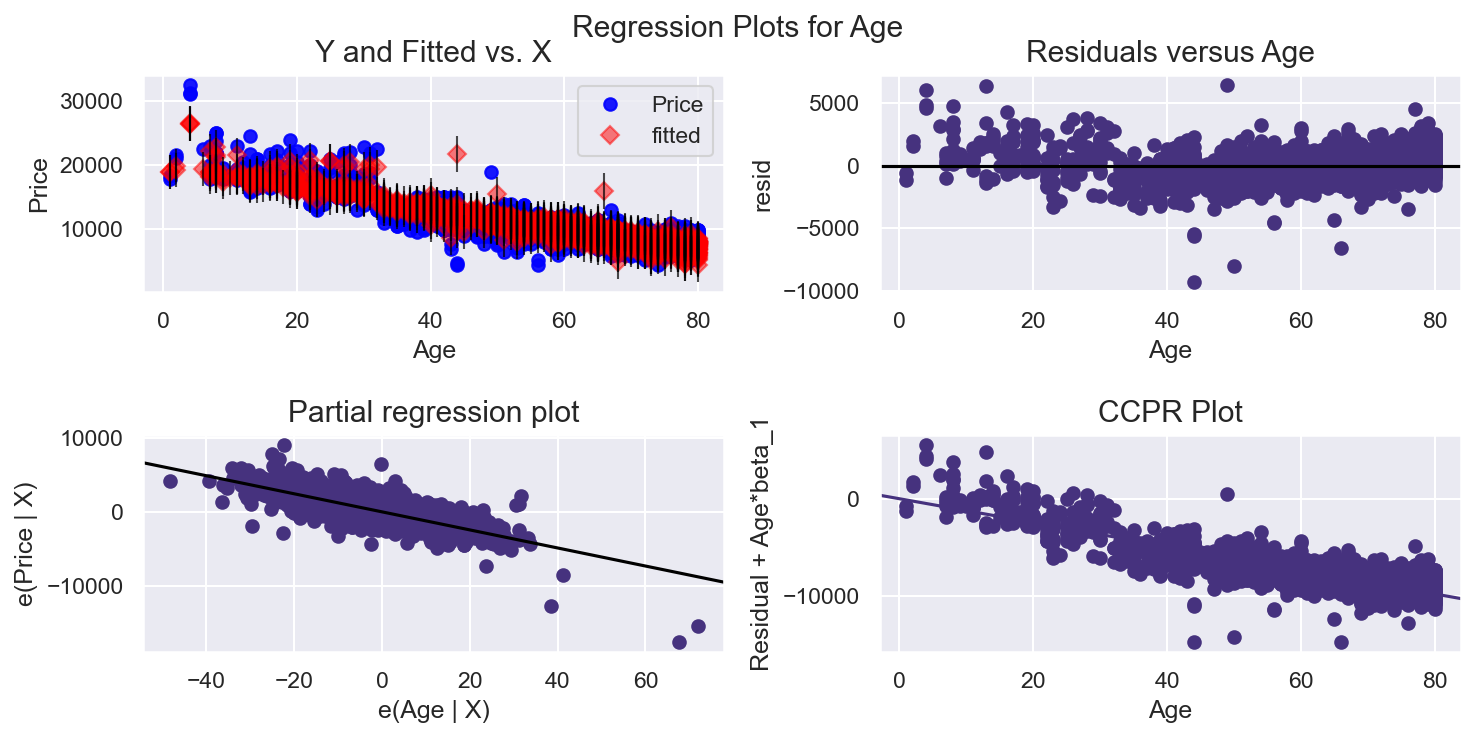

In [29]:
sm.graphics.plot_regress_exog(model,'Age')
plt.show()

eval_env: 1


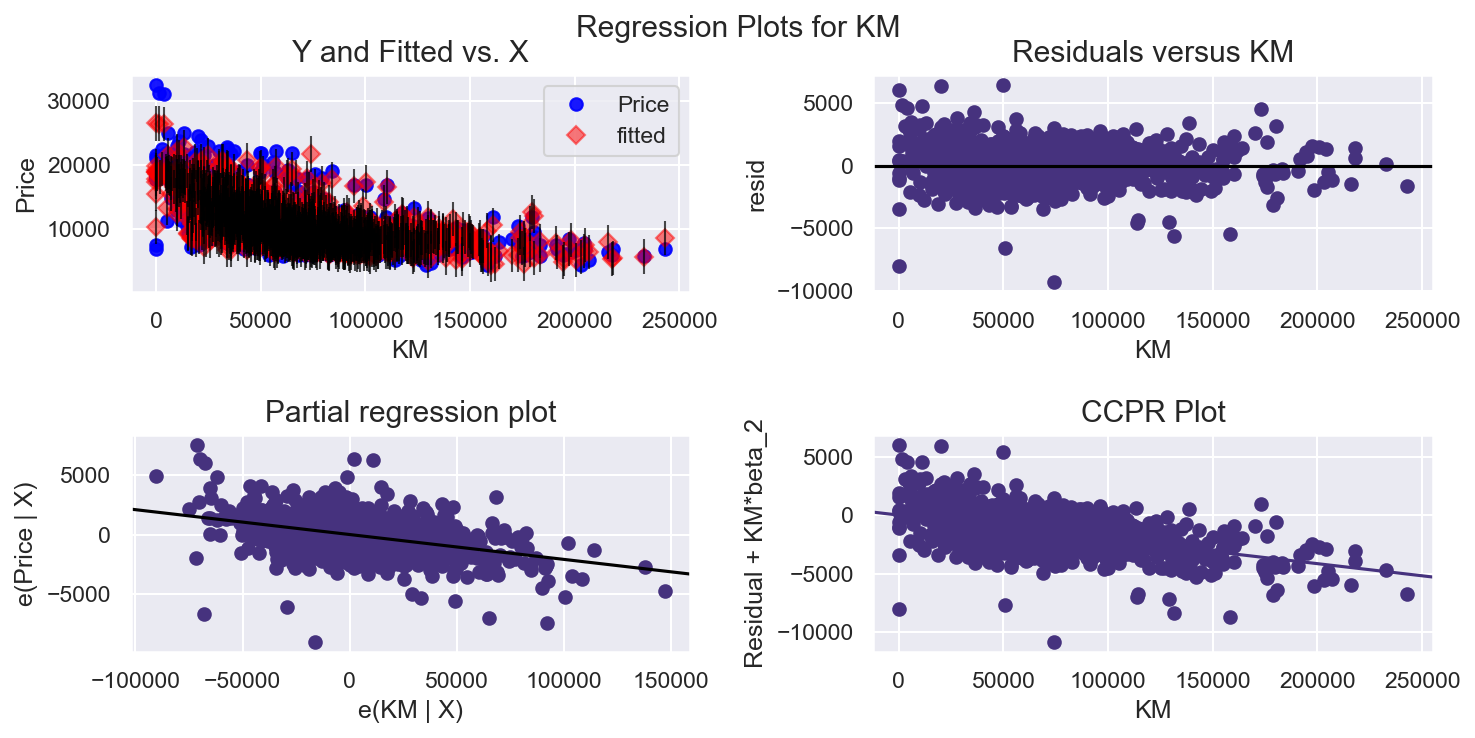

In [30]:
sm.graphics.plot_regress_exog(model,'KM')
plt.show()

eval_env: 1


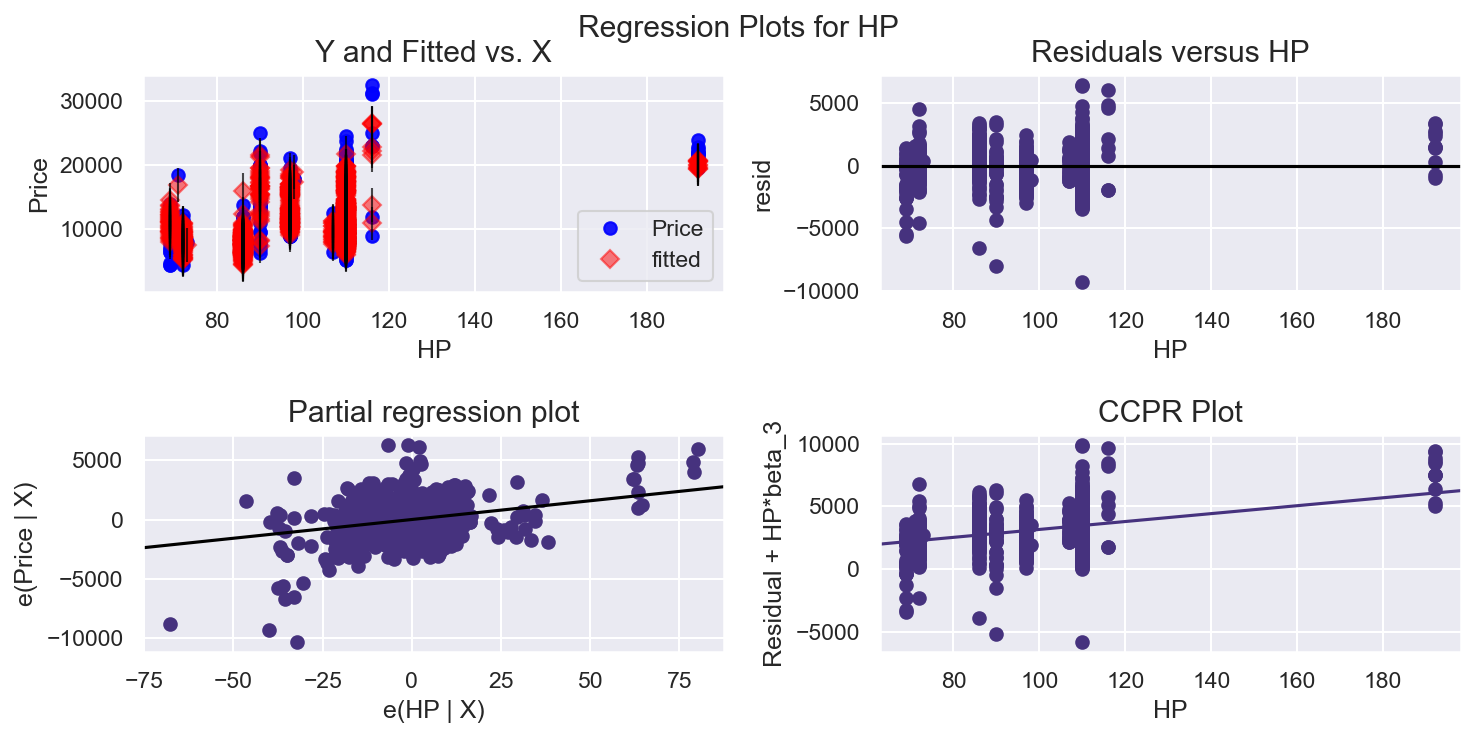

In [31]:
sm.graphics.plot_regress_exog(model,'HP')
plt.show()

eval_env: 1


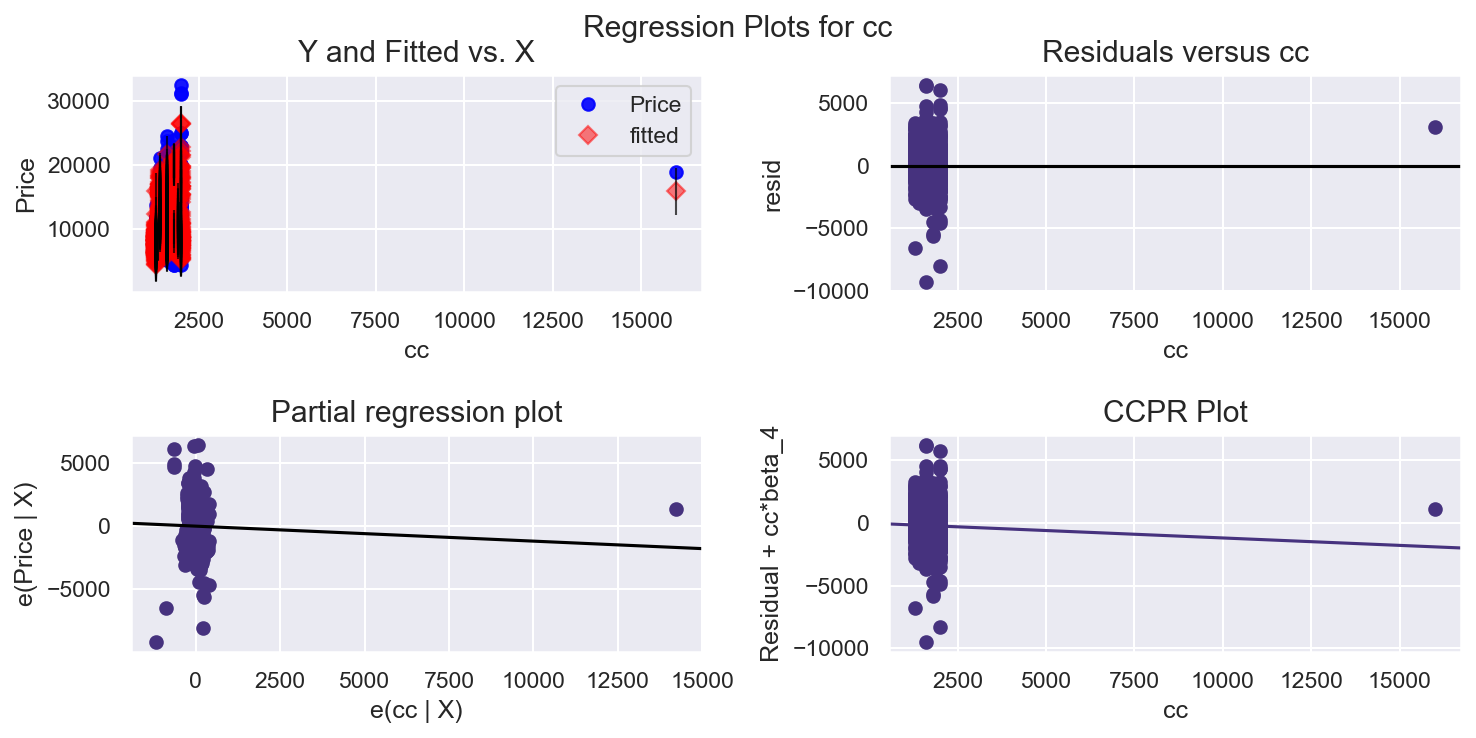

In [32]:
sm.graphics.plot_regress_exog(model,'cc')
plt.show()

eval_env: 1


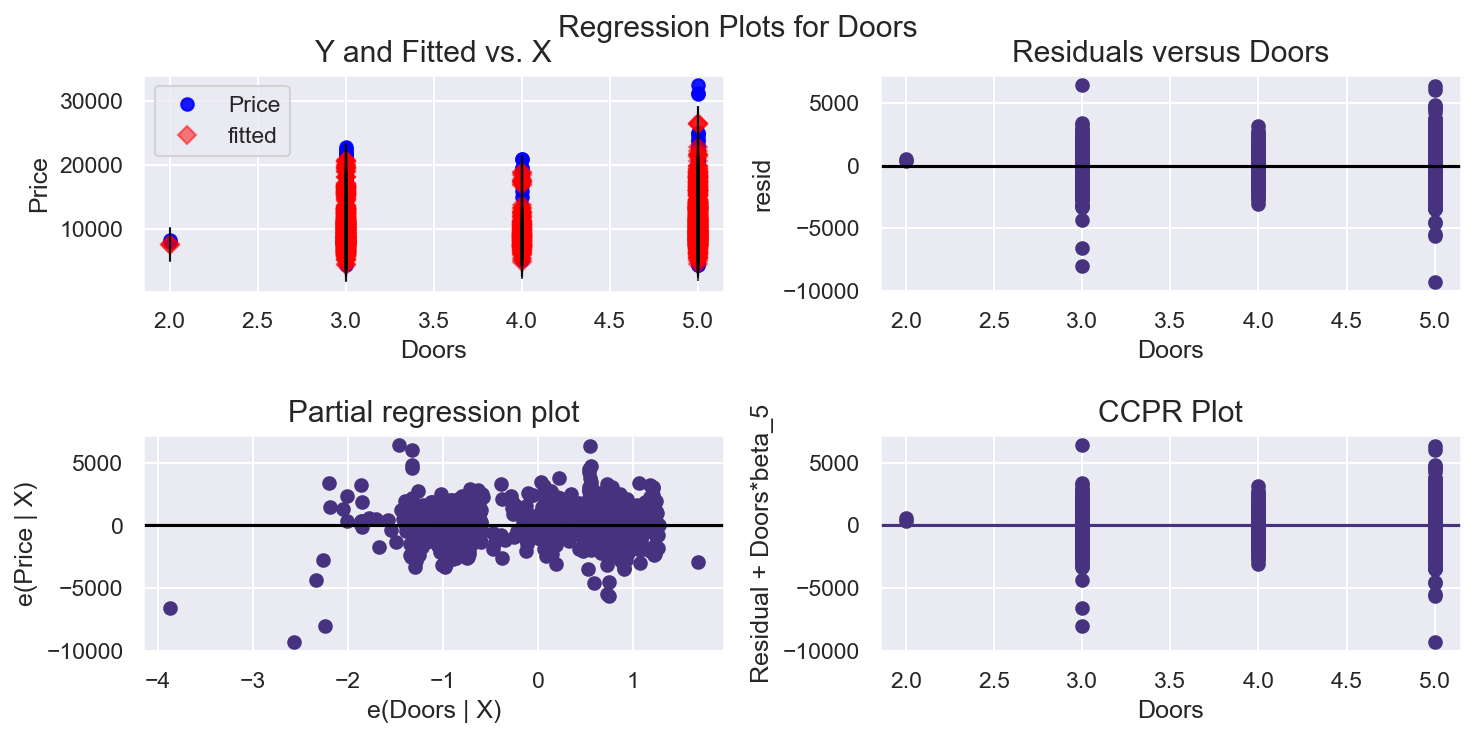

In [33]:
sm.graphics.plot_regress_exog(model,'Doors')
plt.show()

eval_env: 1


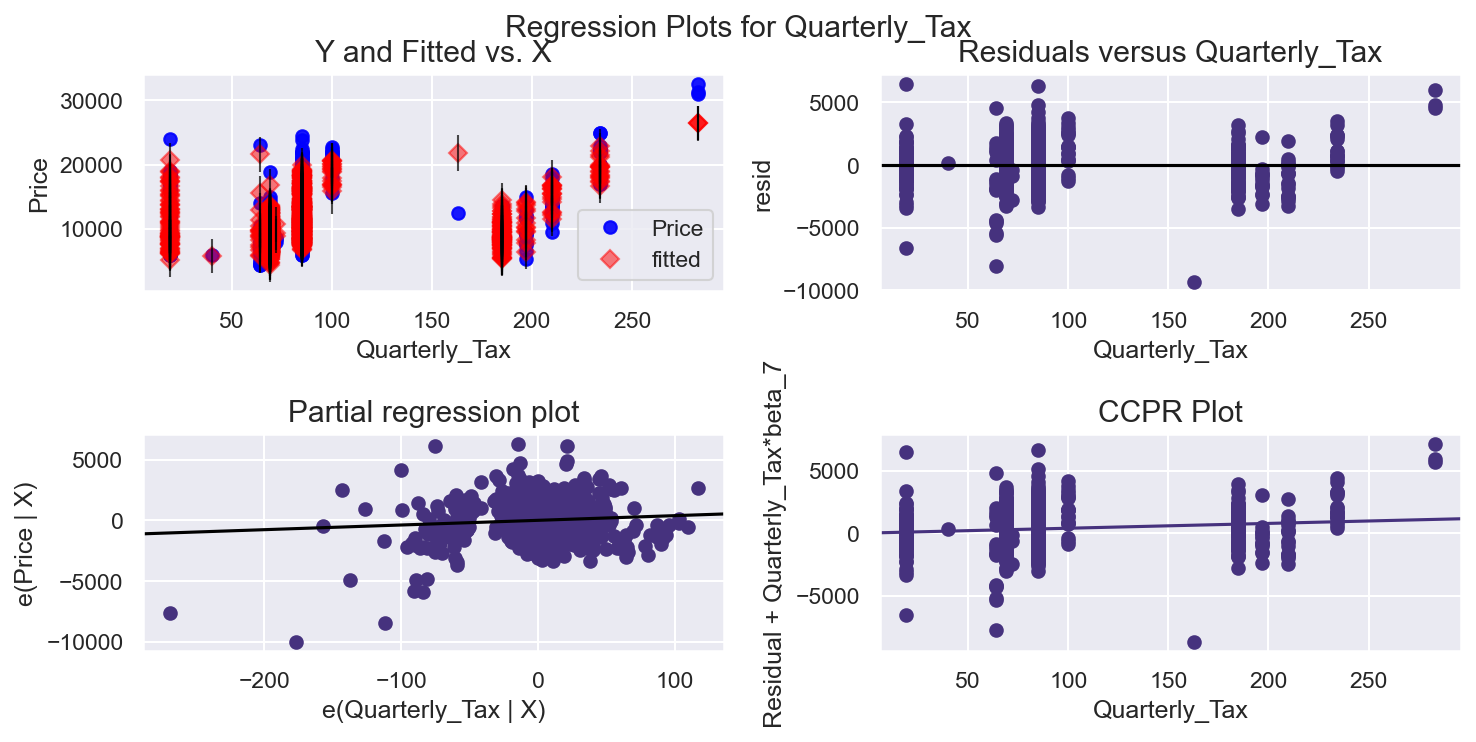

In [34]:
sm.graphics.plot_regress_exog(model,'Quarterly_Tax')
plt.show()

eval_env: 1


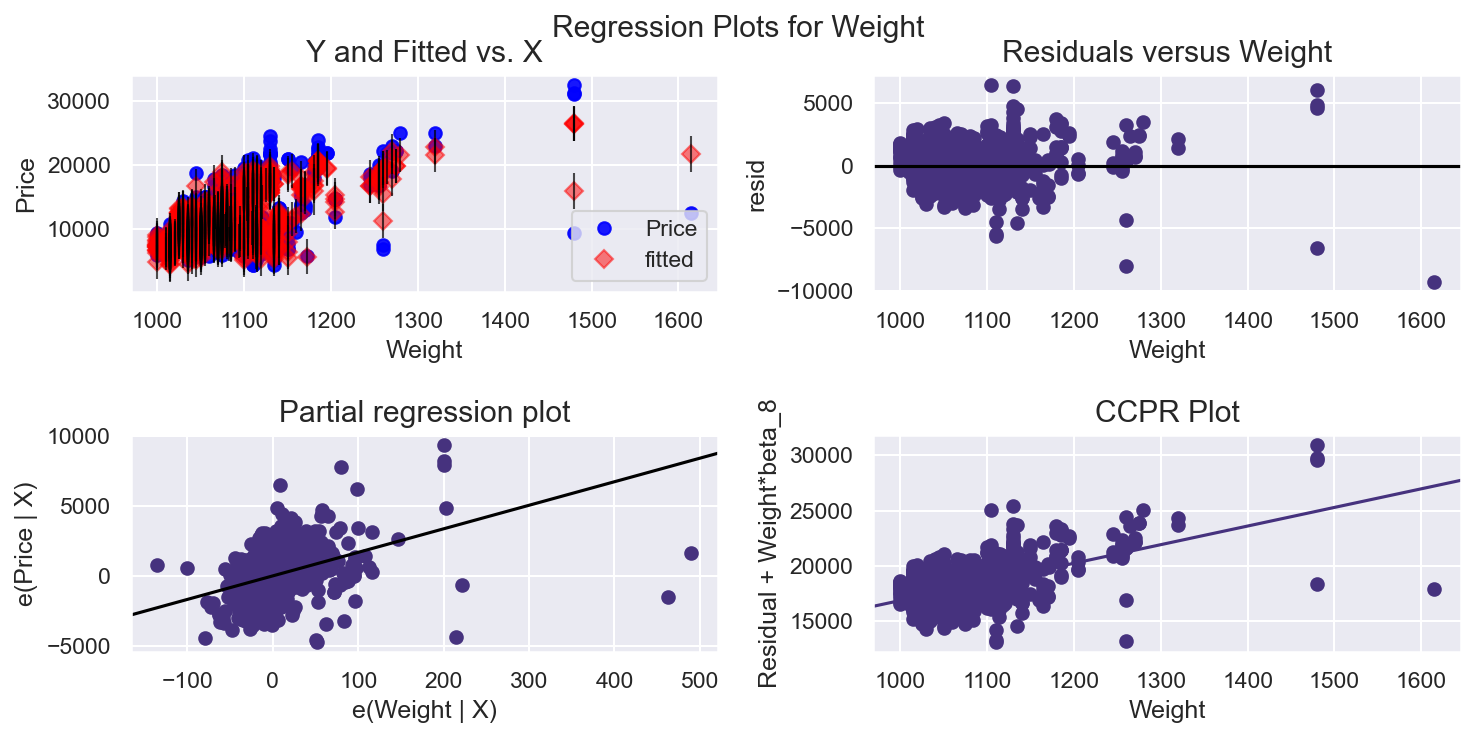

In [35]:
sm.graphics.plot_regress_exog(model,'Weight')
plt.show()

In [36]:
inf = model.get_influence()
c,p = inf.cooks_distance

In [37]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

Text(0.5, 1.0, 'Cooks Distance')

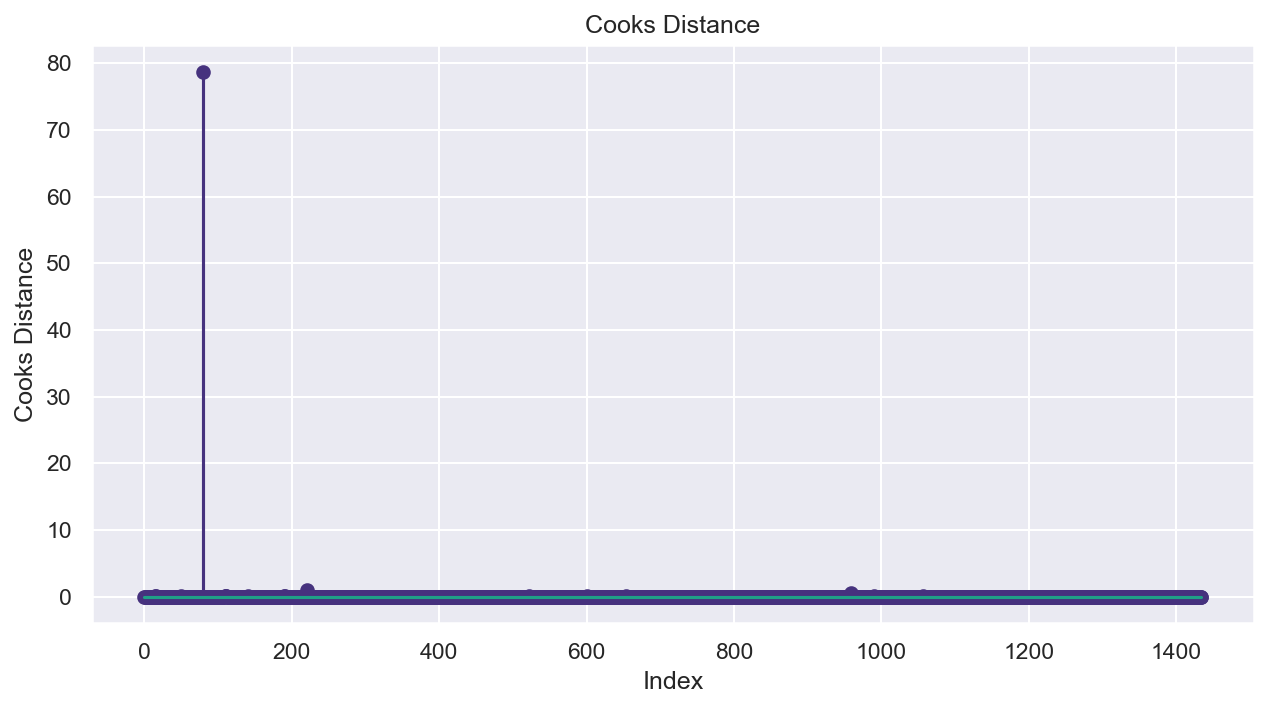

In [38]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.title("Cooks Distance")

In [39]:
np.argmax(c),np.max(c)

(80, 78.7295058225869)

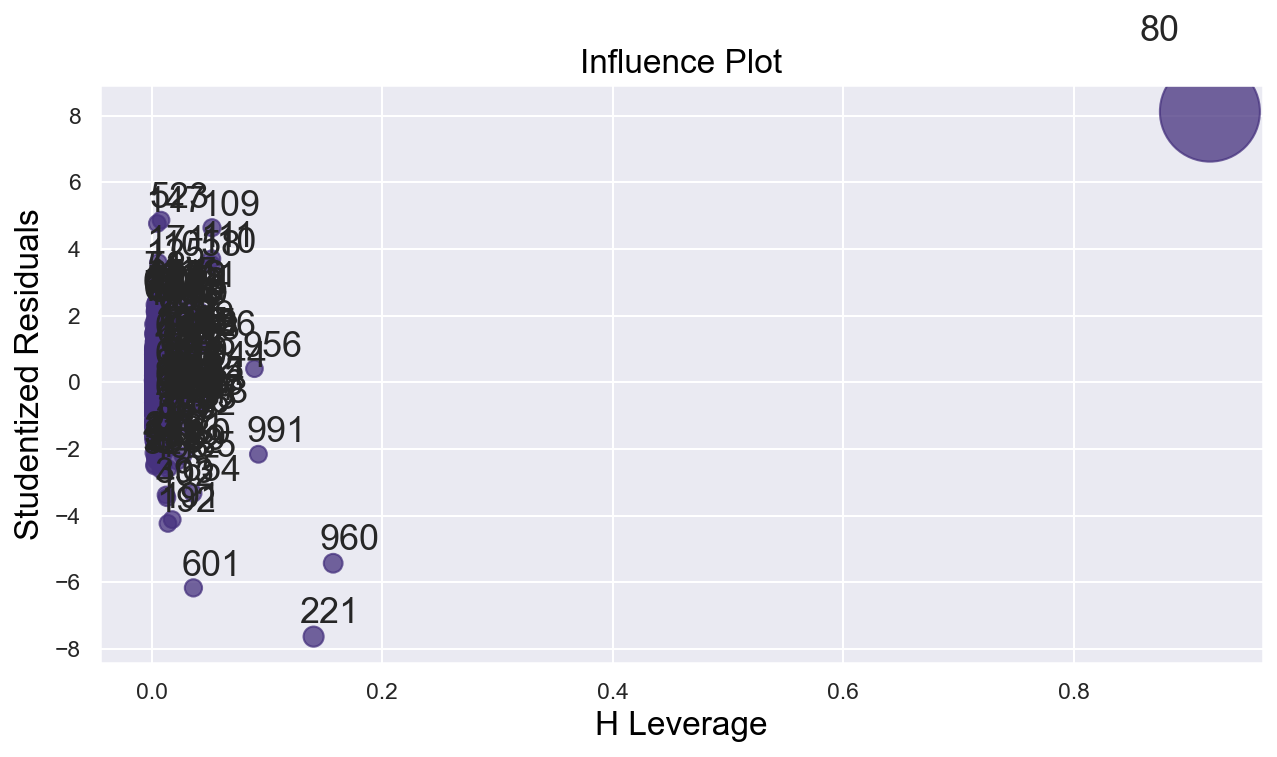

In [40]:
influence_plot(model);

In [41]:
k = len(df.columns)
n = len(df)
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.020905923344947737

In [42]:
df.drop(index=80,inplace=True)

In [43]:
df.reset_index(inplace=True)

In [44]:
df

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
df.drop(columns=['index'],inplace=True)

In [46]:
df

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [47]:
model.rsquared

0.8625200256947

# Model Prediction

In [48]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [49]:
model.predict(new_data)

0    14918.929348
dtype: float64

In [50]:
pred_y = model.predict(df)
pred_y

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1429     8794.255037
1430     8292.577342
1431     8455.434402
1432     8579.222041
1433    10396.087526
Length: 1434, dtype: float64